# WARM UP

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats

df1 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/one.csv')
df2 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/17535dc2c29d6c47c228279e8941c037bb2d4405/two.csv')
df3 = pd.read_csv('https://gist.githubusercontent.com/zgulde/cf9e11788c122bf6a75447209f8a9f0e/raw/a6e34db05ac8d817789c205787527974fa10c092/three.csv')


For df1:

Take a look at the data in df1.

In [2]:
df1.head()

,group,x,time
0,a,7.087113,one
1,a,5.164441,one
2,a,6.150206,one
3,a,3.732648,one
4,a,5.181035,one


Does x increase from time one to time two?

In [3]:
df1.groupby('time').x.value_counts()

time  x        
one   2.442945     1
      2.974954     1
      3.022112     1
      3.123131     1
      3.138024     1
                  ..
two   9.716040     1
      9.784357     1
      9.930851     1
      9.984582     1
      10.250676    1
Name: x, Length: 200, dtype: int64

In [4]:
df1.groupby(['group','time']).x.mean() 

group  time
a      one      5.084092
       two      2.936197
b      one     10.026997
       two      8.065904
Name: x, dtype: float64

In [5]:
df1.groupby('group').x.mean()

group
a    4.768225
b    8.326049
Name: x, dtype: float64

In [6]:
df1.groupby(['group','time']).size() 

group  time
a      one     87
       two     15
b      one     13
       two     85
dtype: int64

- Based off of the first five rows, x seems to increase from time one to time two

Visualize the relationship between x and time.

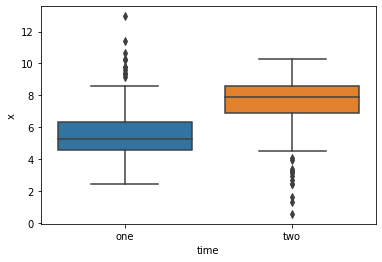

In [7]:
sns.boxplot(df1.time, df1.x)
plt.show()

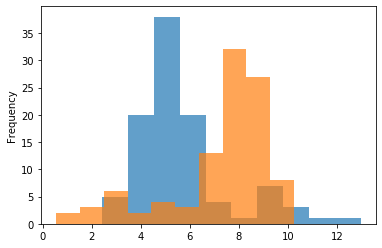

In [8]:
ax = df1[df1.time == 'one'].x.plot.hist(label='time=one', alpha=.7)
df1[df1.time == 'two'].x.plot.hist(label='time=two',ax=ax, alpha=.7)
ax.legend
plt.show()

Run a statistical test to further examine the relationship between these features.

For df2:

Take a look at the data in df2.

In [9]:
df2.head()

,x,y,group
0,101.243108,597.915453,a
1,107.492036,579.638663,a
2,105.348935,614.607337,a
3,99.981116,607.082320,a
4,102.764199,606.082835,a


Visualize the relationship between x and y.

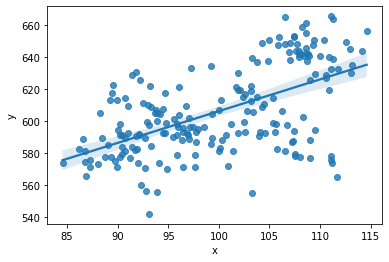

In [10]:
sns.regplot(df2.x, df2.y)
plt.show()

How would you describe the relationship between x and y?

- The relationship between x and y appears to be linear.

Run a statistical test to examine the relationship between x and y.

p =  1.3960403186191819e-18


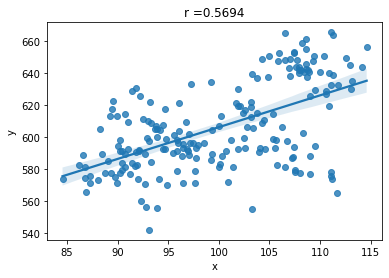

In [11]:
r, p = stats.pearsonr(df2.x, df2.y)
print('p = ', p)
ax = sns.regplot(data = df2, y = 'y', x = 'x')
ax.set(title=f'r ={r:.4f}')
plt.show()

For df3:

Take a look at the data in df3

In [12]:
df3.head()

,surgeon,surgery,success
0,A,appendectomy,1
1,B,appendectomy,1
2,A,heart bypass,0
3,A,appendectomy,1
4,A,heart bypass,1


Which surgeon has the higher success rate?

In [13]:
df3.groupby('surgeon').success.mean()

surgeon
A    0.877083
B    0.723077
Name: success, dtype: float64

- Surgeon A has a higher success rate

If you had to have heart bypass surgery, which surgeon should you go to?

In [14]:
df3.groupby(['surgeon', 'surgery']).success.mean()

surgeon  surgery     
A        appendectomy    0.934383
         heart bypass    0.656566
B        appendectomy    0.931373
         heart bypass    0.672249
Name: success, dtype: float64

- Surgeron B has a higher success rate for heart bypass surgeries

In [15]:
df3.groupby(['surgeon', 'surgery']).size()

surgeon  surgery     
A        appendectomy    381
         heart bypass     99
B        appendectomy    102
         heart bypass    418
dtype: int64

For df1 and df2, what happens to the relationships if you take into account the group feature?

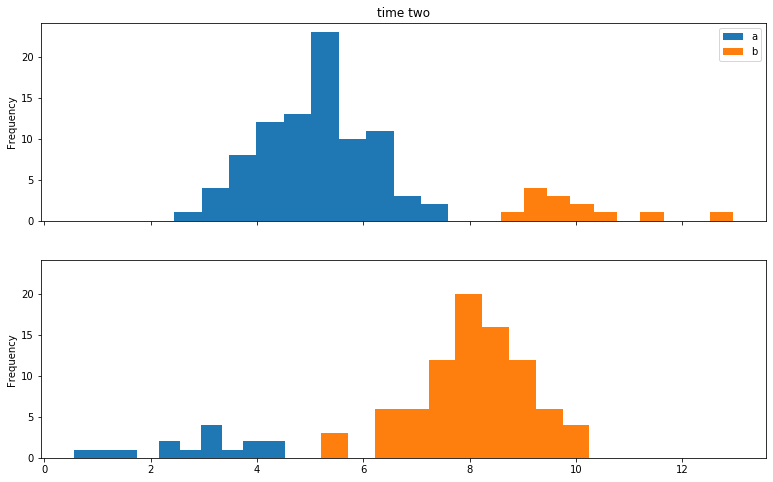

In [19]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (13,8), sharex=True, sharey=True)
df1.query('group == "a" & time == "one"').x.plot.hist(ax=ax1, label = 'a')
df1.query('group == "b" & time == "one"').x.plot.hist(ax=ax1, label = 'b')
ax1.set(title='time one')
ax1.legend()
df1.query('group == "a" & time == "two"').x.plot.hist(ax=ax2, label = 'a')
df1.query('group == "b" & time == "two"').x.plot.hist(ax=ax2, label = 'b')
ax1.set(title='time two')
ax1.legend()
plt.show()

In [ ]:
for group, subset in df2.groupby('group'):
    r, p = stats.pearsonr(subset.x, subset.y)
    sns.regplot(data=subset, x='x', y='y', label = f'{group} -- r = {r:.4f}')
plt.legend()
plt.show()